In [1]:
from scipy.stats import lognorm, pareto, expon
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
from math import exp

In [2]:
def h(w, a=0.05, b=0.1, w_bar=2.5):
    if w <= w_bar:
        return a * w
    else:
        return a * w_bar + b * (w - w_bar)

In [3]:
n = 10_000

In [4]:
url = 'https://media.githubusercontent.com/media/QuantEcon/high_dim_data/update_scf_noweights/SCF_plus/SCF_plus_mini_no_weights.csv'
df = pd.read_csv(url)
df = df.dropna()
df = df[df['year'] == 2016]
df = df.loc[df['n_wealth'] > 1 ]   #restrcting data to net worth > 1
rv = df['n_wealth'].sample(n=n, random_state=1234)
rv = rv.to_numpy() / 100_000
sample = rv

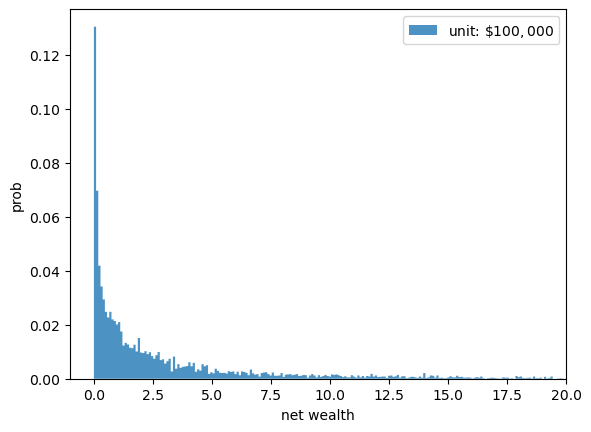

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(-1, 20)
density, edges = np.histogram(sample, bins=5000, density=True)
prob = density * np.diff(edges)
plt.stairs(prob, edges, fill=True, alpha=0.8, label=r"unit: $\$100,000$")
plt.ylabel("prob")
plt.xlabel("net wealth")
plt.legend()
plt.show()

In [6]:
N = 100_000_000

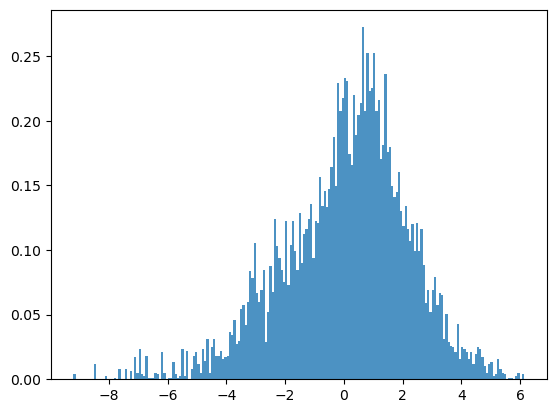

In [7]:
ln_sample = np.log(sample)
fig, ax = plt.subplots()
ax.hist(ln_sample, density=True, bins=200, histtype='stepfilled', alpha=0.8)
plt.show()

In [8]:
μ_hat = np.mean(ln_sample)
μ_hat

0.0634375526654064

In [9]:
num = (ln_sample - μ_hat)**2
σ_hat = (np.mean(num))**(1/2)
σ_hat

2.1507346258433424

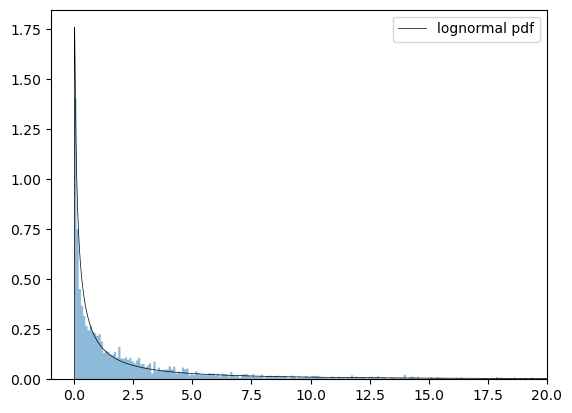

In [10]:
dist_lognorm = lognorm(σ_hat, scale = exp(μ_hat))
x = np.linspace(0,50,10000)

fig, ax = plt.subplots()
ax.set_xlim(-1,20)

ax.hist(sample, density=True, bins=5_000, histtype='stepfilled', alpha=0.5)
ax.plot(x, dist_lognorm.pdf(x), 'k-', lw=0.5, label='lognormal pdf')
ax.legend()
plt.show()

In [11]:
def total_revenue(dist):
    integral, _ = quad(lambda x: h(x) * dist.pdf(x), 0, 100_000)
    T = N * integral
    return T

In [12]:
tr_lognorm = total_revenue(dist_lognorm)
tr_lognorm

101105326.82814859

In [13]:
xm_hat = min(sample)
xm_hat

0.0001

In [14]:
den = np.log(sample/xm_hat)
b_hat = 1/np.mean(den)
b_hat

0.10783091940803055

In [15]:
dist_pareto = pareto(b = b_hat, scale = xm_hat)
tr_pareto = total_revenue(dist_pareto) 
tr_pareto

12933168365.762571

In [16]:
tr_pareto / tr_lognorm

127.91777418162567

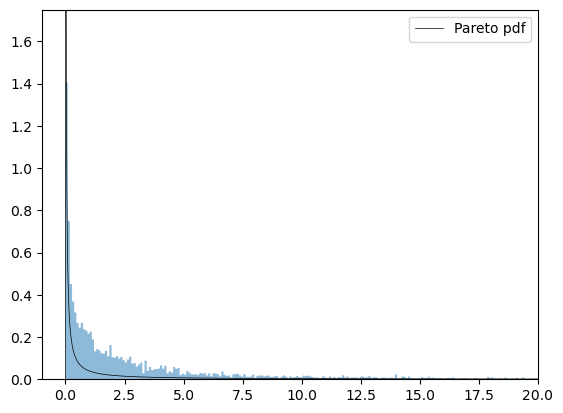

In [17]:
fig, ax = plt.subplots()
ax.set_xlim(-1, 20)
ax.set_ylim(0,1.75)

ax.hist(sample, density=True, bins=5_000, histtype='stepfilled', alpha=0.5)
ax.plot(x, dist_pareto.pdf(x), 'k-', lw=0.5, label='Pareto pdf')
ax.legend()

plt.show()

In [18]:
df_tail = df.loc[df['n_wealth'] > 500_000 ]
df_tail.head()
rv_tail = df_tail['n_wealth'].sample(n=10_000, random_state=4321)
rv_tail = rv_tail.to_numpy()
sample_tail = rv_tail/500_000

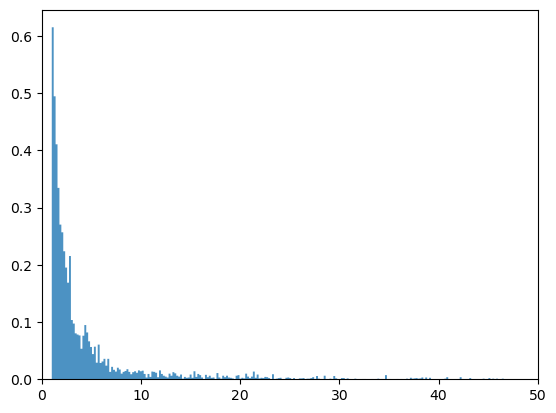

In [19]:
fig, ax = plt.subplots()
ax.set_xlim(0,50)
ax.hist(sample_tail, density=True, bins=500, histtype='stepfilled', alpha=0.8)
plt.show()

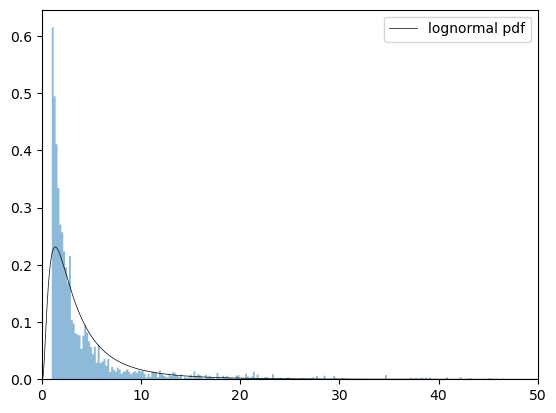

In [20]:
ln_sample_tail = np.log(sample_tail)
μ_hat_tail = np.mean(ln_sample_tail)
num_tail = (ln_sample_tail - μ_hat_tail)**2
σ_hat_tail = (np.mean(num_tail))**(1/2)
dist_lognorm_tail = lognorm(σ_hat_tail, scale = exp(μ_hat_tail))

fig, ax = plt.subplots()
ax.set_xlim(0,50)
ax.hist(sample_tail, density=True, bins=500, histtype='stepfilled', alpha=0.5)
ax.plot(x, dist_lognorm_tail.pdf(x), 'k-', lw=0.5, label='lognormal pdf')
ax.legend()
plt.show()

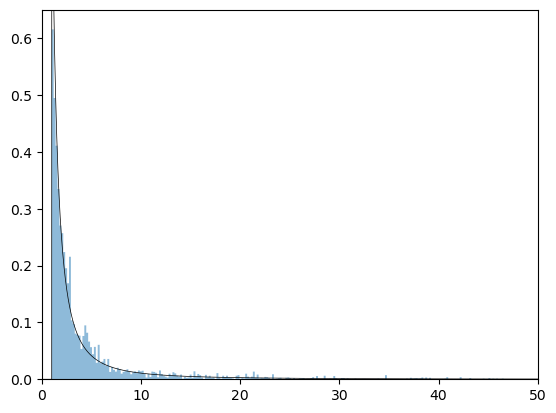

In [21]:
xm_hat_tail = min(sample_tail)
den_tail = np.log(sample_tail/xm_hat_tail)
b_hat_tail = 1/np.mean(den_tail)
dist_pareto_tail = pareto(b = b_hat_tail, scale = xm_hat_tail)

fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(0,0.65)
ax.hist(sample_tail, density=True, bins= 500, histtype='stepfilled', alpha=0.5)
ax.plot(x, dist_pareto_tail.pdf(x), 'k-', lw=0.5, label='pareto pdf')
plt.show()

In [22]:
λ_hat = 1/np.mean(sample)
λ_hat

0.15234120963403971

In [23]:
dist_exp = expon(scale = 1/λ_hat)
tr_expo = total_revenue(dist_exp) 
tr_expo

55246978.53427645

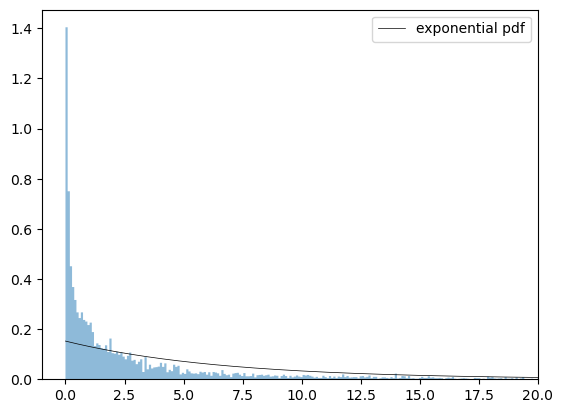

In [24]:
fig, ax = plt.subplots()
ax.set_xlim(-1, 20)

ax.hist(sample, density=True, bins=5000, histtype='stepfilled', alpha=0.5)
ax.plot(x, dist_exp.pdf(x), 'k-', lw=0.5, label='exponential pdf')
ax.legend()

plt.show()